In [48]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

Run the below cell!! if your getting any errors helu

In [59]:
%%time

!git clone https://github.com/ultralytics/yolov5.git
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt  
!cp yolov5/requirements.txt ./


fatal: destination path 'yolov5' already exists and is not an empty directory.


CPU times: total: 15.6 ms
Wall time: 6.12 s


In [50]:
img_h, img_w, num_channels = (380, 676, 3)
df = pd.read_csv('train_solution_bounding_boxes.csv')
df.rename(columns={'image':'image_id'}, inplace=True)
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


In [51]:
index = list(set(df.image_id))
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'training_images/{image}.jpg') #save the ipynb file and the dataset in same directory
img.shape

Image ID: vid_4_1040


(380, 676, 3)

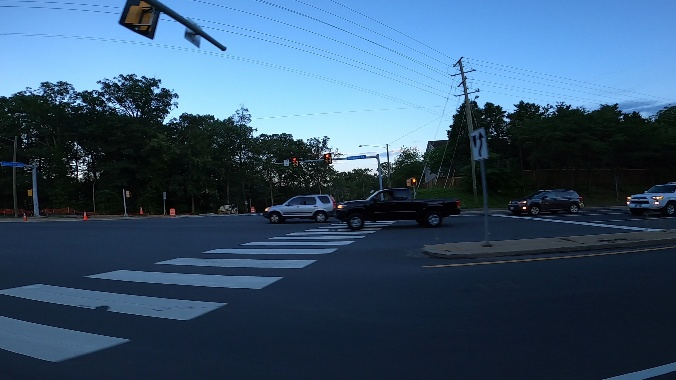

In [52]:
image = random.choice(index)
Image(filename=f'C:/Users/smitha/Desktop/Object_detection/training_images/{image}.jpg',width=600)

In [53]:
source = 'training_images'

def create_directories(base_path, subdirectories):
    for subdirectory in subdirectories:
        path = os.path.join(base_path, subdirectory)
        os.makedirs(path, exist_ok=True)

def save_labels_and_images(fold, path2save, name, mini):
    label_path = '/tmp/convertor/fold{}/labels/{}/{}.txt'.format(fold, path2save, name)
    image_path = '/tmp/convertor/fold{}/images/{}/{}.jpg'.format(fold, path2save, name)

    mini[['classes', 'x_center', 'y_center', 'w', 'h']] \
        .astype(float) \
        .astype(str) \
        .to_csv(label_path, sep=' ', header=False, index=False)

    sh.copy('C:/Users/smitha/Desktop/Object_detection/{}/{}.jpg'.format(source, name), image_path)

def main():
    folds = [0]
    index = range(len(df))  # Assuming df is defined somewhere in your code

    for fold in folds:
        val_index = index[len(index) * fold // 5: len(index) * (fold + 1) // 5]

        for name, mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017'
            else:
                path2save = 'train2017'

            create_directories('/tmp/convertor/fold{}/labels/'.format(fold), [path2save])
            create_directories('/tmp/convertor/fold{}/images/'.format(fold), [path2save])

            save_labels_and_images(fold, path2save, name, mini)

if __name__ == "__main__":
    main()


  0%|          | 0/355 [00:00<?, ?it/s]

In [54]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source C:/Users/smitha/Desktop/Object_detection/testing_images

detect: weights=['yolov5/yolov5s.pt'], source=C:/Users/smitha/Desktop/Object_detection/testing_images, data=yolov5\data\coco128.yaml, imgsz=[676, 676], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-269-gad97dc6 Python-3.10.12 torch-2.1.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING  --img-size [676, 676] must be multiple of max stride 32, updating to [704, 704]
image 1/175 C:\Users\smitha\Desktop\Object_detection\testing_images\vid_5_25100.jpg: 416x704 (no detections), 186.5ms
image 2/175 C:\Users\smitha\Desktop\Object_detection\testing_images\vid_5_25120.jpg: 416x704 (no detections), 141.1m

In the abouve output, check the last line where the images are saved!!

In [55]:
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk("C:/Users/smitha/Desktop/Object_detection/yolov5/runs/detect/exp2"): #add that location here
    predicted_files.extend(filenames)

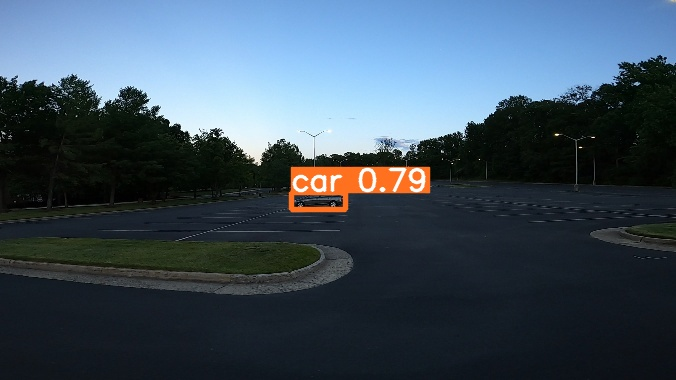

In [56]:
Image(filename=f'C:/Users/smitha/Desktop/Object_detection/yolov5/runs/detect/exp/{random.choice(predicted_files)}') #run multiple times if ur getting only an empty road

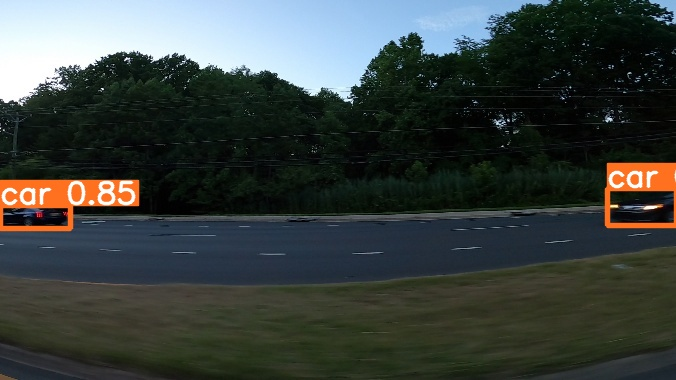

In [57]:
Image(filename=f'C:/Users/smitha/Desktop/Object_detection/yolov5/runs/detect/exp4/{random.choice(predicted_files)}')


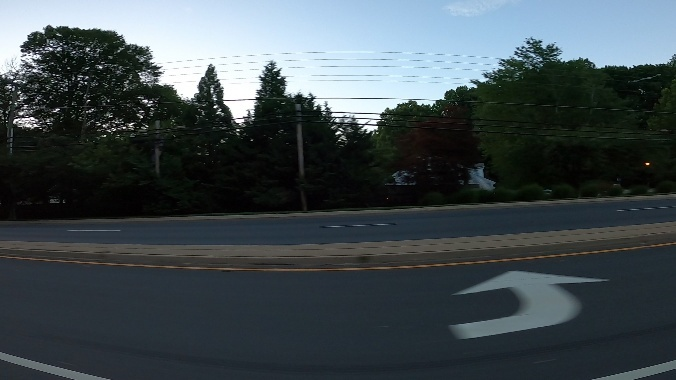

In [58]:
Image(filename=f'C:/Users/smitha/Desktop/Object_detection/yolov5/runs/detect/exp4/{random.choice(predicted_files)}')


In [47]:
'''import os
import random
import cv2

# Specify the directory containing video files
video_directory = 'C:/Users/smitha/Desktop/Object_detection/Video_dataset'

# Filter video files based on extensions (e.g., '.mp4', '.avi')
video_files = [file for file in os.listdir(video_directory) if file.endswith(('.mp4', '.avi'))]

if video_files:
    # Randomly select a video file
    selected_video = "C:/Users/smitha/Desktop/Object_detection/Video_dataset/video.mp4"

    # Display the selected video using OpenCV
    video_path = os.path.join(video_directory, selected_video)
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        cv2.imshow('Selected Video', frame)

        # Press 'q' to exit the video
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
else:
    print("No video files found in the specified directory.")

'''